# Measuring the Josephson Current, the gap voltage and the normal state resistance at 1169ohm 
** **
 * This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following line to install lmfit
#!pip install lmfit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import math

## Data

In [3]:
#Load the data
df = pd.read_csv("./Data/1169_one_pass.csv", sep = " ", header = None)

#Preview the data
df.head()

,0,1,2
0,-7.986,-62.0989,0.00314
1,-7.662,-59.3129,0.00300
2,-7.308,-56.4280,0.00286
3,-6.991,-53.9660,0.00273
4,-6.645,-51.2953,0.00260


## Data wrangling

In [4]:
#Ascribe the columns to the V and I varibles 
V = list(df[0])
I = list(df[1])

#Preview the data
print("V = ", V)
print("I = ", I )

V =  [-7.986, -7.662, -7.308, -6.991, -6.645, -6.334, -6.023, -5.741, -5.409, -5.141, -4.83, -4.576, -4.251, -4.011, -3.714, -3.432, -3.022, -2.817, -2.796, -2.796, -2.782, -2.754, -2.754, -2.74, -2.712, -2.712, -2.712, -2.669, -2.14, 0.057, 0.064, 0.064, 0.049, 0.064, 0.057, 2.853, 2.874, 2.874, 2.895, 2.916, 2.916, 3.255, 3.566, 3.863, 4.11, 4.357, 4.604, 4.886, 5.141, 5.458, 5.72, 6.002, 6.27, 6.624, 6.878, 7.245, 7.485, 7.81, 8.106, 8.346, 8.135, 7.937, 7.753, 7.57, 7.4, 7.188, 7.019, 6.849, 6.652, 6.511, 6.27, 6.136, 5.946, 5.783, 5.628, 5.444, 5.261, 5.105, 4.95, 4.759, 4.59, 4.456, 4.3, 4.103, 3.976, 3.82, 3.637, 3.453, 3.043, 3.001, 2.987, 2.973, 2.959, 2.959, 2.945, 2.938, 2.93, 2.916, 2.923, 2.916, 2.902, 2.902, 2.902, 2.874, 2.874, 2.86, 2.846, 2.832, 0.106, 0.127, 0.127, 0.113, 0.106, 0.127, 0.12, 0.127, 0.12, 0.113, -2.217, -2.697, -2.697, -2.712, -2.705, -2.697, -2.733, -2.712, -2.754, -2.74, -2.782, -3.192, -3.382, -3.531, -3.728, -3.884, -4.025, -4.223, -4.392, -4.548, 

In [5]:
lower_limit = V.index(0.057) + 5
upper_limit = V.index(5.458)

print(lower_limit)
print(upper_limit)

34
49


In [6]:
#Remove the data above the chosen upper limit to enhance the view and focus on the single forward pass
V = np.array(V[lower_limit:upper_limit])

I = np.array(I[lower_limit:upper_limit])

#Preview the new subsets
print("V = ", V)
print("I = ", I)

V =  [0.057 2.853 2.874 2.874 2.895 2.916 2.916 3.255 3.566 3.863 4.11  4.357
 4.604 4.886 5.141]
I =  [10.1084 12.0758 13.8317 16.027  17.7106 19.7455 21.8411 23.8426 25.8898
 27.9295 29.9419 32.3473 34.2424 36.6886 38.858 ]


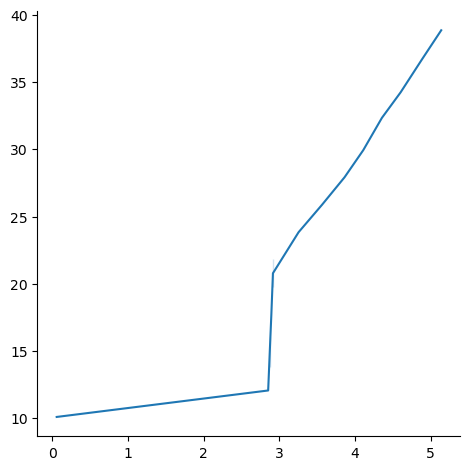

In [7]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Preview the data
sns.relplot(x = V, y = I, kind = "line")

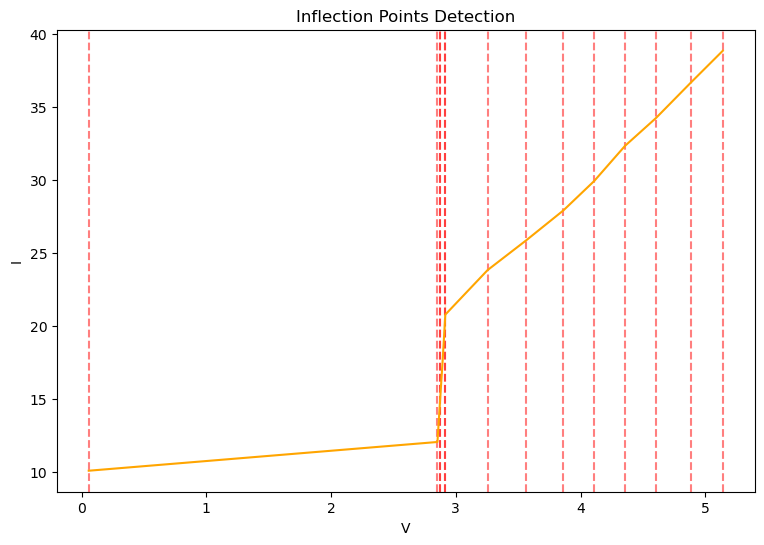

In [8]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the data
V = np.array(V)
I = np.array(I)


# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.1:
        change_points.append(i)

# Mark the change points on the plot
for point in change_points:
    plt.axvline(V[point], color='r', linestyle='--', alpha=0.5)

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

In [9]:
#Preview the inflection points array
inflection_points = []

### Clear the graph above to focus on Ic and Vc

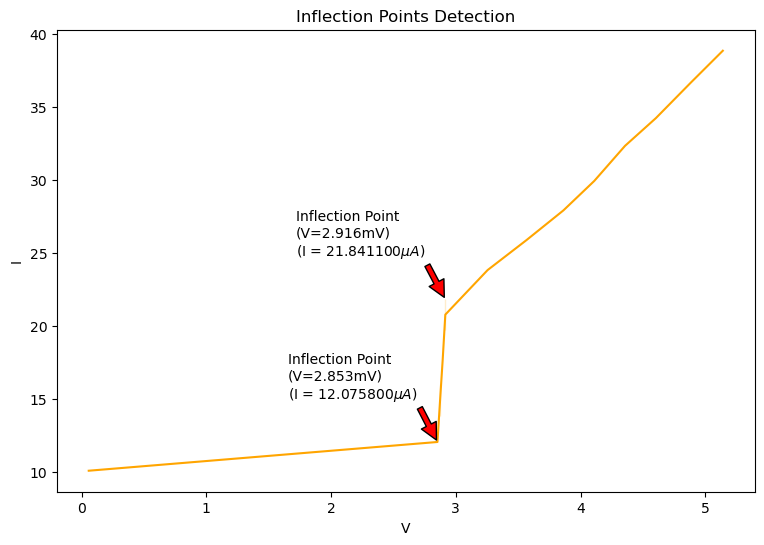

In [10]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.1:
        change_points.append(i)

# Annotate inflection points on the graph
for idx, point in enumerate(change_points):
    if idx in [1, 5]:
        plt.annotate(f'Inflection Point\n(V={V[point]:.3f}mV)\n(I = {np.interp(V[point], V, I):3f}$\mu A$)', 
                     xy=(V[point], np.interp(V[point], V, I)),
                     xytext=(V[point] - 1.2, np.interp(V[point], V, I) + 3),
                     arrowprops={'facecolor': 'red', 'shrink': 0.05})

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

# Estimating the normal state resistance (Rn)

In [11]:
#Preview the main dataset
print(list(df[0]))

[-7.986, -7.662, -7.308, -6.991, -6.645, -6.334, -6.023, -5.741, -5.409, -5.141, -4.83, -4.576, -4.251, -4.011, -3.714, -3.432, -3.022, -2.817, -2.796, -2.796, -2.782, -2.754, -2.754, -2.74, -2.712, -2.712, -2.712, -2.669, -2.14, 0.057, 0.064, 0.064, 0.049, 0.064, 0.057, 2.853, 2.874, 2.874, 2.895, 2.916, 2.916, 3.255, 3.566, 3.863, 4.11, 4.357, 4.604, 4.886, 5.141, 5.458, 5.72, 6.002, 6.27, 6.624, 6.878, 7.245, 7.485, 7.81, 8.106, 8.346, 8.135, 7.937, 7.753, 7.57, 7.4, 7.188, 7.019, 6.849, 6.652, 6.511, 6.27, 6.136, 5.946, 5.783, 5.628, 5.444, 5.261, 5.105, 4.95, 4.759, 4.59, 4.456, 4.3, 4.103, 3.976, 3.82, 3.637, 3.453, 3.043, 3.001, 2.987, 2.973, 2.959, 2.959, 2.945, 2.938, 2.93, 2.916, 2.923, 2.916, 2.902, 2.902, 2.902, 2.874, 2.874, 2.86, 2.846, 2.832, 0.106, 0.127, 0.127, 0.113, 0.106, 0.127, 0.12, 0.127, 0.12, 0.113, -2.217, -2.697, -2.697, -2.712, -2.705, -2.697, -2.733, -2.712, -2.754, -2.74, -2.782, -3.192, -3.382, -3.531, -3.728, -3.884, -4.025, -4.223, -4.392, -4.548, -4.71

In [12]:
#The dataset includes points from two complete sweeps
#Identify the index of the approximate limits of the normal state on the positive side of the graph 

#Function for detecting the first occurrence of an item in a list
def find_first_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            first_occurrence = i
            break
    return first_occurrence

low_limit = find_first_occurrence(2.916, list(df[0])) #the second change point above
up_limit = list(df[0]).index(df[0].max())

print(low_limit) 
print(up_limit)

39
59


In [13]:
#Select data from the first pass
V_n = np.array(df[0][low_limit:up_limit])
I_n = np.array(df[1][low_limit:up_limit])

#Preview the data
print(V_n)
print(I_n)

[2.916 2.916 3.255 3.566 3.863 4.11  4.357 4.604 4.886 5.141 5.458 5.72
 6.002 6.27  6.624 6.878 7.245 7.485 7.81  8.106]
[19.7455 21.8411 23.8426 25.8898 27.9295 29.9419 32.3473 34.2424 36.6886
 38.858  41.1289 43.1734 45.7227 47.9786 50.2891 52.7218 55.0643 57.587
 60.1513 62.2435]


## Define the model and fit the data

In [14]:
#Define the variables and convert to Volts and Amps
x = V_n / 0.001
y = I_n / 0.000001

#Use builtin NameModel, specify prefix for each:
mod = LinearModel(prefix='') 

#Set the initial parameters to 'guess' mode
pars  = mod.guess(y, x = x)

#Fit with weights=1/yerr
result = mod.fit(y, pars, x = x, weights= 1. / (y * 0.01817))

#Print the fit results
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 20
    # variables        = 2
    chi-square         = 18.0313012
    reduced chi-square = 1.00173895
    Akaike info crit   = 1.92753857
    Bayesian info crit = 3.91900312
    R-squared          = 1.00000000
[[Variables]]
    slope:      8034.89231 +/- 96.8211357 (1.21%) (init = 8024.464)
    intercept: -2716826.95 +/- 438440.564 (16.14%) (init = -2646578)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9495


## Plot the model

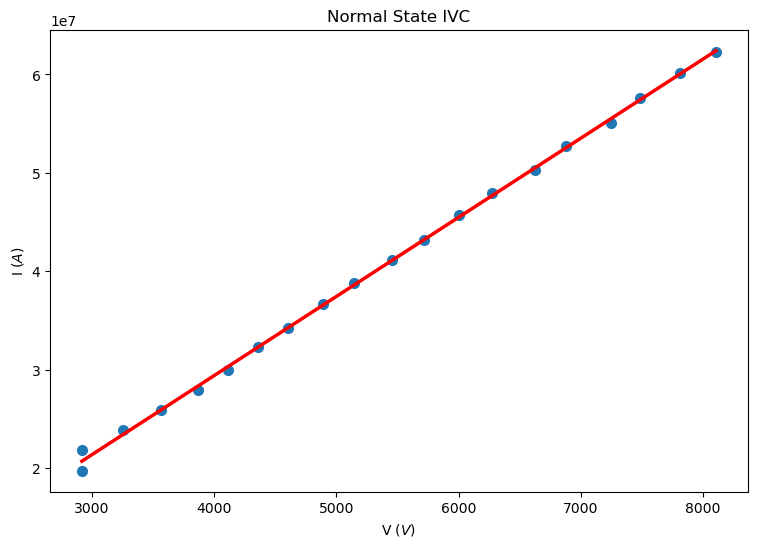

In [15]:
#Set the figure size
plt.figure(figsize = (9,6))

#Plot the data and the model
plt.scatter(x, y, linewidth=2)
plt.plot(x, result.best_fit, 'r-', linewidth=2.5)

# Set plot labels and title
plt.xlabel('V ($V$)')
plt.ylabel('I ($A$)')
plt.title('Normal State IVC')

#Show the plot
plt.show()

# Calculating the theoretical Ic and V_gap

![](./img/Ic_formula.png)

In [16]:
#Access the model parameters
varys = result.params.valuesdict()

varys

{'slope': 8034.892306692875, 'intercept': -2716826.948653902}

In [17]:
#The slope is equal to 1 / R 
R_n = 1 / varys.get("slope")

print('Normal state resistance: R_n = ', round(R_n, 6), 'Ohm') 

Normal state resistance: R_n =  0.000124 Ohm


In [18]:
#Define the terms for the strong and weak coupling formulas 
t_c = 9.25 #critical temperature
delta_0 = 2.25288819E-22 # from 1.764 * k_B * t_c,  [check eqn. 1 on the report paper] 
t = 4.73517611 #from the calibration curve in notebook 2
e = 1.6022E-19 #elementay charge
pi = 3.14159265358979323846264338327950 
t_red = t / t_c #the reduced temperature
k_B = 1.3807E-23 #Boltzmann constant
R_n = 1 / varys.get("slope") #from the slope of the IVC


#weak coupling formula

delta_weak = delta_0 * 1.74 * math.sqrt(1.0 - t_red)

E_weak = delta_weak * 2

V_weak = (E_weak / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_weak = (pi / 2) * (delta_weak / (e * R_n)) * math.tanh(delta_weak / (2 * k_B * t))


#strong coupling approximation

delta_strong = (delta_0) * math.sqrt(math.cos((pi * t_red**2)  / 2 )) 

E_strong = delta_strong * 2

V_strong = (E_strong / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_strong = (pi / 2) * (delta_strong / (e * R_n)) * math.tanh(delta_strong / (2 * k_B * t))


#Print the results
print('Temperature =', t, 'K')
print('-----------------------------')
print('-----------------------------')
                         
print('Weak Coupling Formula')
print('-----------------------------')


print('delta_t =', delta_weak, 'J')
print('Gap Energy =', E_weak, 'J')
print('Gap Voltage =', V_weak, 'mV')
print('Josephson Current =', Ic_weak, 'uA')
print('______________________________')
print('______________________________')
print('------------------------------')
print('Strong Coupling Approximation')
print('------------------------------')

print('delta_t =', delta_strong, 'J')
print('Gap Energy = ', E_strong, 'J')
print('Gap Voltage =', V_strong, 'mV')
print('Josephson Current =', Ic_strong, 'uA')
print('________________________________')
print('________________________________')
print('________________________________')

Temperature = 4.73517611 K
-----------------------------
-----------------------------
Weak Coupling Formula
-----------------------------
delta_t = 2.7386619475277844e-22 J
Gap Energy = 5.477323895055569e-22 J
Gap Voltage = 3.4186268225287533 mV
Josephson Current = 20.929103726833482 uA
______________________________
______________________________
------------------------------
Strong Coupling Approximation
------------------------------
delta_t = 2.156743932971374e-22 J
Gap Energy =  4.313487865942748e-22 J
Gap Voltage = 2.6922281025731793 mV
Josephson Current = 15.779533732456965 uA
________________________________
________________________________
________________________________


In [19]:
#Add all the collected results to a dictionary
Josephson_data = {"Ic" : np.interp(V[5], V, I) , "Ic_weak" : round(Ic_weak, 4), "Ic_strong" : round(Ic_strong, 4), "V_gap" : V[1], "Vg_weak" : round(V_weak, 4), "Vg_strong" : round(V_strong, 4), "Temp" : round(t, 4)}

#Preview the newly created row of data
print(Josephson_data)

{'Ic': 21.8411, 'Ic_weak': 20.9291, 'Ic_strong': 15.7795, 'V_gap': 2.853, 'Vg_weak': 3.4186, 'Vg_strong': 2.6922, 'Temp': 4.7352}


## Export the results to a csv file

In [20]:
# import csv

# with open(r'./Data/Josephson_data.csv', 'a', newline='') as csvfile:
#     fieldnames = ['Ic','Ic_weak', 'Ic_strong', 'V_gap', 'Vg_weak', 'Vg_strong', 'Temp']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

#     writer.writerow(Josephson_data)

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>